In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.ticker as ticker

In [2]:
salary: pd.DataFrame = pd.read_csv('https://richardson.byu.edu/220/ds_salary.csv')
salary

,...1,work_year,experience_level,employment_type,job_title,salary,salary_currency,salary_in_usd,employee_residence,remote_ratio,company_location,company_size
0,0,2020,MI,FT,Data Scientist,70000,EUR,79833,DE,0,DE,L
1,1,2020,SE,FT,Machine Learning Scientist,260000,USD,260000,JP,0,JP,S
2,2,2020,SE,FT,Big Data Engineer,85000,GBP,109024,GB,50,GB,M
3,3,2020,MI,FT,Product Data Analyst,20000,USD,20000,HN,0,HN,S
4,4,2020,SE,FT,Machine Learning Engineer,150000,USD,150000,US,50,US,L
...,...,...,...,...,...,...,...,...,...,...,...,...
576,602,2022,SE,FT,Data Engineer,154000,USD,154000,US,100,US,M
577,603,2022,SE,FT,Data Engineer,126000,USD,126000,US,100,US,M
578,604,2022,SE,FT,Data Analyst,129000,USD,129000,US,0,US,M
579,605,2022,SE,FT,Data Analyst,150000,USD,150000,US,100,US,M


## General Salary Data
Start by plotting and describing the general shape of the salary data. This initial step sets the foundation for your analysis.

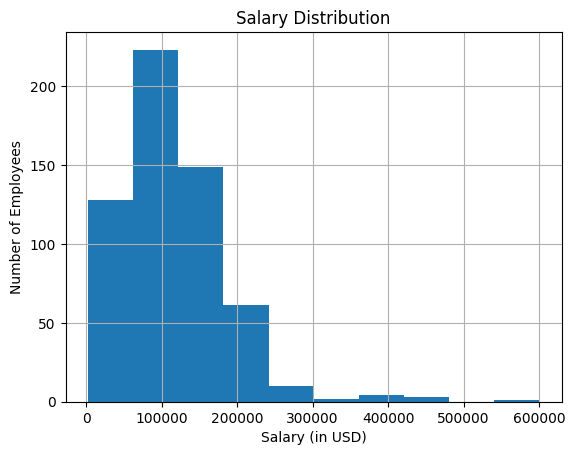

In [3]:
salary['salary_in_usd'].hist()
plt.title('Salary Distribution')
plt.xlabel('Salary (in USD)')
plt.ylabel('Number of Employees')
plt.show()

We plotted the salary against the number of employees in a histogram.
Since we're not comparing the salary to any other variable yet,
a histogram made the most sense.

This gives us a sense that salaries for data scientists are generally right-skewed.

## Effect of Experience on Salary

Investigate how experience influences data scientist salaries. Create visualizations or tables to illustrate any trends or patterns.

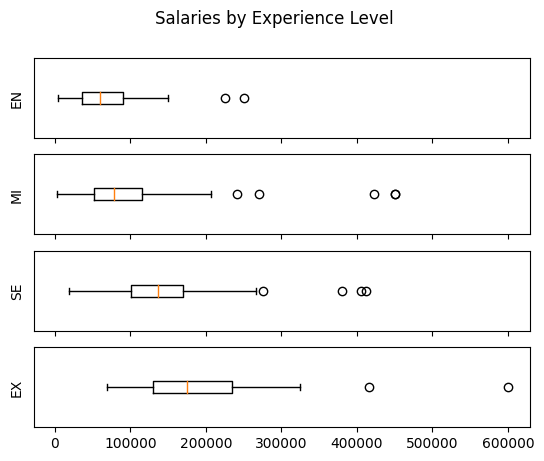

In [4]:
fig, axs = plt.subplots(4,1, sharex=True)
fig.suptitle('Salaries by Experience Level')

for ax, experience in zip(axs, ('EN', 'MI', 'SE', 'EX')):
    ax.boxplot(salary[salary['experience_level'] == experience]['salary_in_usd'], vert=False)
    ax.set_ylabel(experience)
    ax.set_yticks([])

# EN Entry-level
# Junior MI Mid-level
# Intermediate SE Senior-level
# Expert EX Executive-level

These box plots show that there's a positive correlation between salary and experience level.

For all experience levels, all—except the minimum—of the five-number summary increases exponentially.
Also, the highest outlying salary for each experience level is about double the highest salary.

For all experience levels other than expert:
* The minimum salary is about the same
* The inter-quartile range is about the same

For the expert experience level, the inter-quartile range is significantly larger.


In [ ]:
fig, axs = plt.subplots(1,4, sharey=True, sharex=True, figsize=(10,6))
fig.suptitle('Number of Employees with Each Salary by Experience Level')

for ax, experience in zip(axs, ('EN', 'MI', 'SE', 'EX')):
    ax.hist(salary[salary['experience_level'] == experience]['salary_in_usd'])
    ax.set_xlabel(experience)
    ax.xaxis.set_major_formatter(ticker.EngFormatter())

Graphing the data into a series of histograms shows that the salaries are still skewed-right.
Most of the collected data is focused on data scientists with middle or senior experience.
These graphs confirms that the salaries are closely clustered for the vast majority of data scientists with the same level of experience (except for expert level data scientists, which have a larger range and inter-quartile range).

## Impact of Company Size on Salary

Explore how company size affects data scientist salaries. Generate plots or tables to visualize this relationship.

In [ ]:
fig, axs = plt.subplots(3,1, sharex=True)
fig.suptitle('Salaries by Company Size')

for ax, company_size, label in zip(axs, ('S', 'M', 'L'), ('Small', 'Medium', 'Large')):
    ax.boxplot(salary[salary['company_size'] == company_size]['salary_in_usd'], vert=False)
    ax.set_ylabel(label)
    ax.set_yticks([])

In [ ]:
fig, axs = plt.subplots(1,3, sharey=True, sharex=True, figsize=(8,6))
fig.suptitle('Number of Employees with Each Salary by Company Size')

for ax, company_size, label in zip(axs, ('S', 'M', 'L'), ('Small', 'Medium', 'Large')):
    ax.hist(salary[salary['company_size'] == company_size]['salary_in_usd'])
    ax.set_xlabel(company_size)
    ax.xaxis.set_major_formatter(ticker.EngFormatter())

In [ ]:
## 4. Job Title Analysis

In [ ]:
df = pd.read_csv('https://richardson.byu.edu/220/ds_salary.csv')
df.head()

In [ ]:
df["job_title"].value_counts()

In [ ]:
analysts = df[df['job_title'].str.contains("Analyst|Analytics")]
analysts = analysts[analysts['job_title'].str.contains("Lead|Manager|Director|Head") == False]
analysts['job_title'].value_counts()

In [ ]:
engineers = df[df['job_title'].str.contains("Engineer")]
engineers = engineers[engineers['job_title'].str.contains("Lead|Manager|Director|Head|Principal") == False]
engineers['job_title'].value_counts()

In [ ]:
scientists = df[df['job_title'].str.contains("Scientist|Science")]
scientists = scientists[scientists['job_title'].str.contains("Lead|Manager|Director|Head|Engineer") == False]
scientists['job_title'].value_counts()

In [ ]:
leaders = df[df['job_title'].str.contains("Lead|Manager|Director|Head|Principal")]
leaders['job_title'].value_counts()

In [ ]:
plt.xticks(rotation=90)
plt.xlabel('job title')
plt.ylabel('salary')
plt.title('Salary by Job Title for Leaders in Industry')
plt.bar(leaders['job_title'], leaders['salary_in_usd'])

In [ ]:
plt.xticks(rotation=90)
plt.xlabel('job title')
plt.ylabel('salary')
plt.title('Salary by Job Title for Engineers in Industry')
plt.bar(engineers['job_title'], engineers['salary_in_usd'])

In [ ]:
plt.xticks(rotation=90)
plt.xlabel('job title')
plt.ylabel('salary')
plt.title('Salary by Job Title for Analysts in Industry')
plt.bar(analysts['job_title'], analysts['salary_in_usd'])

In [ ]:
plt.xticks(rotation=90)
plt.xlabel('job title')
plt.ylabel('salary')
plt.title('Salary by Job Title for Analysts in Industry')
plt.bar(scientists['job_title'], scientists['salary_in_usd'])